## Homework 05: due 2022/05/18 23:59(100%)

### - There are differences between every OpenCV version, please use the version 4.4.0.40 to avoid generating bugs.  

### - Tutorial : 
1. Feature extraction and matching: https://docs.opencv.org/4.4.0/db/d27/tutorial_py_table_of_contents_feature2d.html
2. Feature detectors (ORB & FAST): https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf 
                   
### - After you go through the tutorials, you should be able to work on this assignment.

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [ ]:
# Set up the environment
## Install opencv with version 4.4.0
!pip3 install opencv-python==4.4.0.40

     |████████████████████████████████| 49.4 MB 1.6 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Download the images
!gdown --id "1LaYcBfYtjdze8pCBPTfMjnTFOp46B7yC" --output ./test1.jpg
!gdown --id "1VlOx8bBkzPSrn6AEeZ2-pgl-a6F3vtzO" --output ./test2.jpg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1LaYcBfYtjdze8pCBPTfMjnTFOp46B7yC
To: /content/test1.jpg
100% 221k/221k [00:00<00:00, 100MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1VlOx8bBkzPSrn6AEeZ2-pgl-a6F3vtzO
To: /content/test2.jpg
100% 221k/221k [00:00<00:00, 105MB/s]


In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

#### 1. Feature detector (40%)
##### Please use the following feature detectors (FAST, ORB, SIFT) and draw the feature points on the __test1.jpg__ images.
###### (Example figure)
![figure1.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure1.jpg?raw=true)

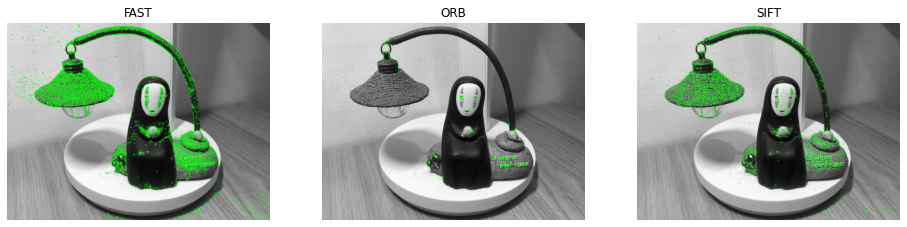

In [ ]:
# import image
img = cv2.imread('test1.jpg',cv2.IMREAD_GRAYSCALE)

# Initiate 3 types of object with default values
fast = cv2.FastFeatureDetector_create()
orb = cv2.ORB_create()
sift = cv2.SIFT_create()

# find the keypoints with 3 feature detectors
kp_fast = fast.detect(img,None)
kp_orb = orb.detect(img,None)
kp_sift = sift.detect(img,None)

# draw keypoints 
img_fast = cv2.drawKeypoints(img, kp_fast, None, color=(0,255,0))
img_orb = cv2.drawKeypoints(img, kp_orb, None, color=(0,255,0))
img_sift = cv2.drawKeypoints(img, kp_sift, None, color=(0,255,0))

# Plot
fig, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].imshow(img_fast)
ax[0].set_title('FAST')
ax[0].axis('off')
ax[1].imshow(img_orb)
ax[1].set_title('ORB')
ax[1].axis('off')
ax[2].imshow(img_sift)
ax[2].set_title('SIFT')
ax[2].axis('off')
plt.show()

### Observations: 
> For the above figures, we can see clearly that feature points in "FAST" are more than other two feature descriptors, and the "ORB" has less feature points.

#### 2. Feature matching (60%)
##### Please match the feature points from the __test1.jpg__ and __test2.jpg__.Also, please apply Lowe's ratio test (with ratio 0.6 and 0.8) to match the features and observe the differences when adjusting the ratio.
##### 2.1 Please use __SIFT__ as feature detector and descriptor.(30%) 
###### (Example figure)
![figure2.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure2.jpg?raw=true)


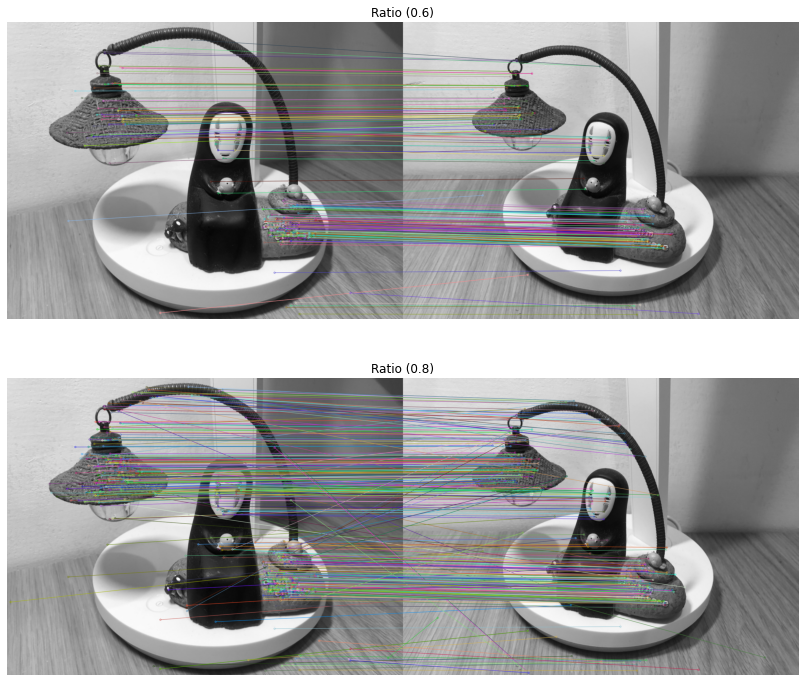

In [ ]:
img1 = cv2.imread('test1.jpg',cv2.IMREAD_GRAYSCALE) # queryImage
img2 = cv2.imread('test2.jpg',cv2.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
ratio_six = []
for m,n in matches:
    if m.distance < 0.6*n.distance:
        ratio_six.append([m])

ratio_eight = []
for a,b in matches:
    if a.distance < 0.8*b.distance:
        ratio_eight.append([a])


# feature matching
img_six = cv2.drawMatchesKnn(img1,kp1,img2,kp2,ratio_six,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_eight = cv2.drawMatchesKnn(img1,kp1,img2,kp2,ratio_eight,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plot
fig, ax = plt.subplots(2, 1, figsize=(20,12))
ax[0].imshow(img_six)
ax[0].set_title('Ratio (0.6)')
ax[0].axis('off')
ax[1].imshow(img_eight)
ax[1].set_title('Ratio (0.8)')
ax[1].axis('off')
plt.show()

### Observations: 
> For higher ratio, more points will show in the figure, which means there have larger distance and more flexibility to accept matching features, so in this part we can see for ratio 0.6 its matching features are quiet less than ratio 0.8.

##### 2.2 Please use __ORB__ as feature detector and descriptor.(30%) 
###### (Example figure)
![figure3.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure3.jpg?raw=true)

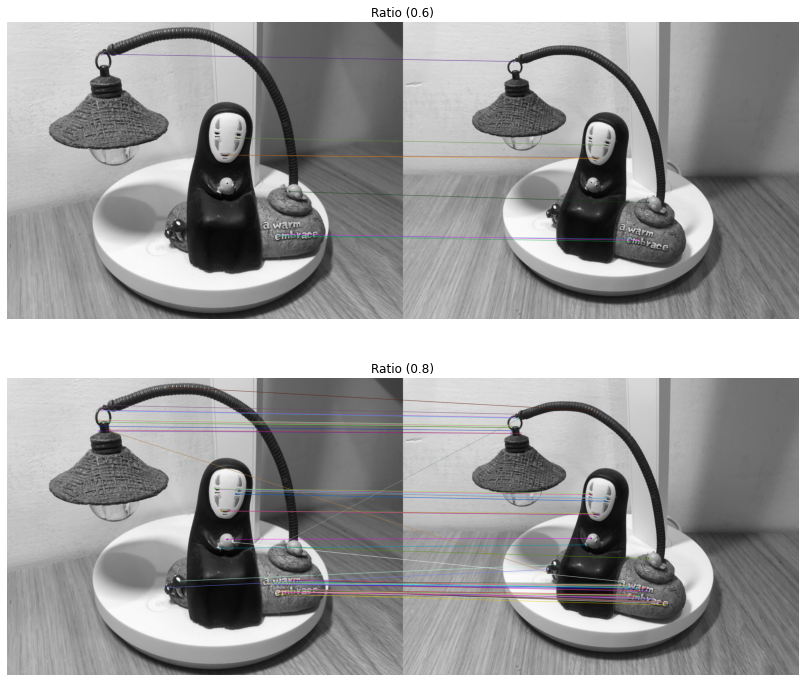

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


# create BFMatcher object and descriptors
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
ratio_six = []
for m,n in matches:
    if m.distance < 0.6*n.distance:
        ratio_six.append([m])

ratio_eight = []
for a,b in matches:
    if a.distance < 0.8*b.distance:
        ratio_eight.append([a])


# feature matching
img_six = cv2.drawMatchesKnn(img1,kp1,img2,kp2,ratio_six,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_eight = cv2.drawMatchesKnn(img1,kp1,img2,kp2,ratio_eight,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Plot
fig, ax = plt.subplots(2, 1, figsize=(20,12))
ax[0].imshow(img_six)
ax[0].set_title('Ratio (0.6)')
ax[0].axis('off')
ax[1].imshow(img_eight)
ax[1].set_title('Ratio (0.8)')
ax[1].axis('off')
plt.show()


### Observations: 
> For different kinds of feature detectors, which have been shown in question 1. We have observed that ORB has less feature points in the figure, and that will have the same outcomes when two images are under feature matching, so there are less matching than SIFT. Comparing the ratio, for higher ratio which means there have larger distance and more flexibility to accept matching features, so in this part we can see for ratio 0.6 only has 8 items serve as matching features and ratio 0.8 has 70 items.  